In [24]:
# Importar bibliotecas necesarias para el análisis de datos y visualización
import numpy as np  # Para operaciones numéricas y generación de datos aleatorios
import pandas as pd  # Para manipulación de datos en formato DataFrame
import matplotlib.pyplot as plt  # Para crear visualizaciones
import seaborn as sns  # Para visualizaciones estadísticas mejoradas
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Para normalización de datos
from sklearn.impute import SimpleImputer  # Para manejar valores faltantes
from sklearn.preprocessing import LabelEncoder  # Para codificar variables categóricas

# Configurar el estilo de las gráficas para mejor visualización
plt.style.use('seaborn-v0_8-whitegrid')  # Aplicar estilo seaborn para gráficos más atractivos

# Cargar los datos generados "pacientes_mejorado.csv"
pacientes_df = pd.read_csv('pacientes_mejorado.csv')

print("\nPrimeras filas del dataset:")
pacientes_df.head()
pacientes_df.info()


Primeras filas del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   10000 non-null  int64  
 1   genero                 10000 non-null  object 
 2   presion_sistolica      8944 non-null   float64
 3   presion_diastolica     10000 non-null  float64
 4   frecuencia_cardiaca    8966 non-null   float64
 5   temperatura            9021 non-null   float64
 6   diagnostico            10000 non-null  object 
 7   riesgo_cardiovascular  10000 non-null  bool   
 8   categoria_fc           8966 non-null   object 
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 634.9+ KB




=== 1. Limpieza de datos ===

Valores faltantes antes de la limpieza:
<bound method DataFrame.sum of        edad  genero  presion_sistolica  presion_diastolica  \
0     False   False               True               False   
1     False   False              False               False   
2     False   False              False               False   
3     False   False              False               False   
4     False   False              False               False   
...     ...     ...                ...                 ...   
9995  False   False              False               False   
9996  False   False              False               False   
9997  False   False              False               False   
9998  False   False              False               False   
9999  False   False              False               False   

      frecuencia_cardiaca  temperatura  diagnostico  riesgo_cardiovascular  \
0                   False        False        False                  False

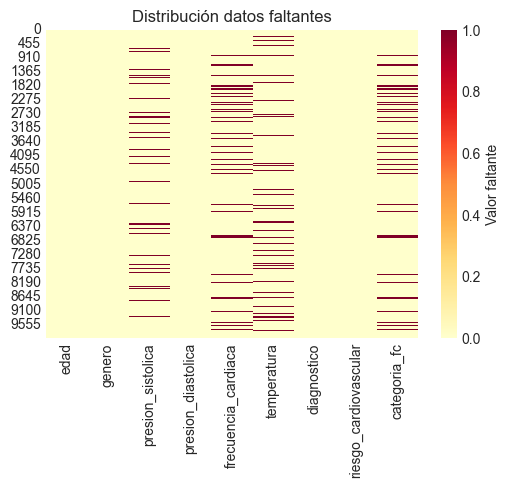


=== Valores faltantes después de la limpieza: ===
edad                        0
genero                      0
presion_sistolica           0
presion_diastolica          0
frecuencia_cardiaca         0
temperatura                 0
diagnostico                 0
riesgo_cardiovascular       0
categoria_fc             1034
dtype: int64


In [25]:
# 1. Limpieza de datos: Manejo de valores faltantes
print("\n\n=== 1. Limpieza de datos ===")
print("\nValores faltantes antes de la limpieza:")
print(pacientes_df.isnull().sum)

# Crear visualización de matriz de correlación con datos faltantes
plt.figure(figsize=(6, 4))
sns.heatmap(pacientes_df.isnull(), cmap='YlOrRd', cbar_kws={'label': 'Valor faltante'})
plt.title('Distribución datos faltantes') 
plt.show()

# Imputación de valores faltantes usando la mediana para mediciones numéricas
imputer = SimpleImputer(strategy= 'median')                #Se sustituyen los valores nulos por la mediana

# Lista de columnas numéricas que se van a imputar
columnas_numericas = ['presion_sistolica', 'presion_diastolica', 'frecuencia_cardiaca', 'temperatura']

# Aplicamos la imputacion a las columnas numericas, reemplazo de los valores faltantes
pacientes_df[columnas_numericas] = imputer.fit_transform(pacientes_df[columnas_numericas])

# Imprimimos los valores faltantes

print("\n=== Valores faltantes después de la limpieza: ===")
print(pacientes_df.isnull().sum())


#### Gráfico propuesto: Countplot para las categorías de frecuencia cardíaca (categoria_fc)


=== 2. Enriquecimiento de datos ===
       presion_sistolica  presion_diastolica
count       10000.000000        10000.000000
mean          120.301907           73.872354
std            22.424175           12.755227
min            80.000000           60.000000
25%           105.113099           61.361168
50%           119.860956           71.777373
75%           134.396654           82.479314
max           200.000000          126.307305

Nueva caracteristica de riesgos cardiovascular
riesgo_cardiovascular
True     8979
False    1021
Name: count, dtype: int64

Nueva categoria "categoria_fc"
categoria_fc
Normal         8193
Bradicardia    1378
Taquicardia     429
Name: count, dtype: int64


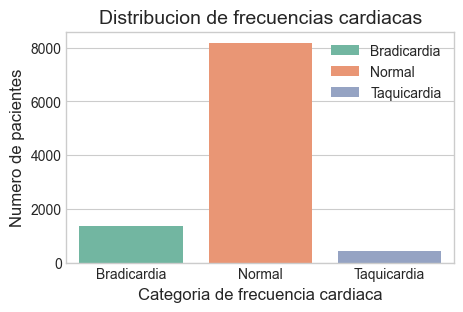

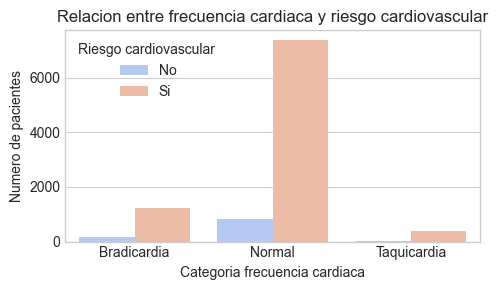

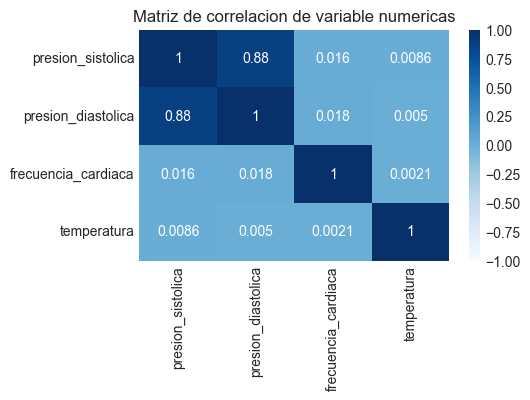

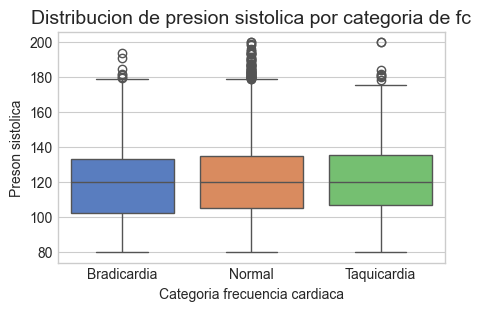

In [26]:
# 2. Enriquecimiento de datos: Crear nuevas características clínicamente relevantes
print("\n=== 2. Enriquecimiento de datos ===")

print(pacientes_df[['presion_sistolica', 'presion_diastolica']].describe())


# Calcular índice de riesgo cardiovascular basado en presión arterial
pacientes_df['riesgo_cardiovascular'] = (pacientes_df['presion_diastolica'] > 140) | \
    (pacientes_df['presion_sistolica'] > 90)


# Crear categorías de frecuencia cardíaca según rangos clínicos
bins_fc = [0, 60, 100, float('inf')]
labels_fc = ['Bradicardia', 'Normal', 'Taquicardia']
pacientes_df['categoria_fc'] = pd.cut(pacientes_df['frecuencia_cardiaca'],
                                      bins = bins_fc,
                                      labels = labels_fc)


# Mostrar la distribucion de riesgo cardiovascular
print('\nNueva caracteristica de riesgos cardiovascular')
print(pacientes_df['riesgo_cardiovascular'].value_counts())

# Nueva categoria
print('\nNueva categoria "categoria_fc"')
print(pacientes_df['categoria_fc'].value_counts())

####################### Distribución de Categorías de Frecuencia Cardíaca. ####################

# Configurar el tamaño de la figura
plt.figure(figsize=(5, 3))

# Crear el countplot
sns.countplot(data = pacientes_df, x = 'categoria_fc', hue = 'categoria_fc', palette = 'Set2', legend = False)

# Personalizar el gráfico
plt.title('Distribucion de frecuencias cardiacas', fontsize = 14)
plt.xlabel('Categoria de frecuencia cardiaca', fontsize = 12)
plt.ylabel('Numero de pacientes', fontsize = 12)
plt.legend(labels_fc)


# Mostrar el gráfico
plt.show()

########################### Riesgo Cardiovascular ####################
plt.figure(figsize=(5, 3))

# Creamos el grafico de barras para mostrar la relacion entre frecuencia cardiaca y riesgo cardiovascular
sns.countplot(data = pacientes_df, x = 'categoria_fc', hue = 'riesgo_cardiovascular', palette = 'coolwarm')


# Agregar la leyenda fuera del gráfico
# plt.legend(title='Riesgo Cardiovascular', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Relacion entre frecuencia cardiaca y riesgo cardiovascular')
plt.xlabel('Categoria frecuencia cardiaca')
plt.ylabel('Numero de pacientes')
plt.legend(title = 'Riesgo cardiovascular ', labels = ['No', 'Si'])


# Ajustar para evitar solapamientos
plt.tight_layout()

plt.show()

#######################  Heatmap correlación entre vaiables. ###############
# Seleccionar columnas numéricas
numeric_cols = ['presion_sistolica', 'presion_diastolica', 'frecuencia_cardiaca']
matriz = pacientes_df[columnas_numericas].corr()

# Crear el heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(matriz, annot = True, cmap = 'Blues', vmin = -1, vmax = 1)
plt.title('Matriz de correlacion de variable numericas')

plt.show()

####################### Boxplot para presión arterial por categoría de frecuencia cardíaca ###################
plt.figure(figsize=(5, 3))

sns.boxplot(data = pacientes_df, x = 'categoria_fc', y = 'presion_sistolica', hue = 'categoria_fc', palette = 'muted', legend = False)

# Personalizamos grafico
plt.title('Distribucion de presion sistolica por categoria de fc', fontsize = 14)
plt.xlabel('Categoria frecuencia cardiaca', fontsize= 10)
plt.ylabel('Preson sistolica', fontsize = 10)
plt.show()



In [27]:
# 3. Preprocesamiento de datos
print("\n=== 3. Preprocesamiento ===")

# Crear las categorías de edad antes de la normalización
bins_edad = [0, 25, 45, 65, float('inf')]
labels_edad = ['Joven', 'Adulto', 'Maduro', 'Mayor']
pacientes_df['grupo_edad'] = pd.cut(pacientes_df['edad'],
                                   bins = bins_edad,
                                   labels = labels_edad)


# Estandarización de variables numéricas para análisis estadístico
scaler = StandardScaler()
variables_numericas = [
    'edad',
    'presion_sistolica',
    'presion_diastolica',
    'frecuencia_cardiaca',
    'temperatura'
]

pacientes_df[variables_numericas] = scaler.fit_transform(pacientes_df[variables_numericas])
pacientes_scaled = pacientes_df.copy()

# Normalización usando Min-Max Scaler para variables que deben estar entre 0 y 1
normalizer = MinMaxScaler()
pacientes_df[variables_numericas] = normalizer.fit_transform(pacientes_df[variables_numericas])

# Codificación de variables categóricas para análisis numérico
le = LabelEncoder()                  #Convierte las variables de texto en numeros todo de la mano en las 3 lineas
pacientes_df['genero_codificado'] = le.fit_transform(pacientes_df['genero']) 
pacientes_df['diagnostico_codificado'] = le.fit_transform(pacientes_df['diagnostico'])

print("\nEstadísticas descriptivas después del preprocesamiento:")
print(pacientes_df.describe())



=== 3. Preprocesamiento ===

Estadísticas descriptivas después del preprocesamiento:
               edad  presion_sistolica  presion_diastolica  \
count  10000.000000       10000.000000        10000.000000   
mean       0.495458           0.335849            0.209213   
std        0.129731           0.186868            0.192365   
min        0.000000           0.000000            0.000000   
25%        0.405172           0.209276            0.020528   
50%        0.491379           0.332175            0.177618   
75%        0.586207           0.453305            0.339017   
max        1.000000           1.000000            1.000000   

       frecuencia_cardiaca   temperatura  genero_codificado  \
count         10000.000000  10000.000000       10000.000000   
mean              0.399757      0.476990           0.467600   
std               0.159004      0.134632           0.498974   
min               0.000000      0.000000           0.000000   
25%               0.300715      0.393962

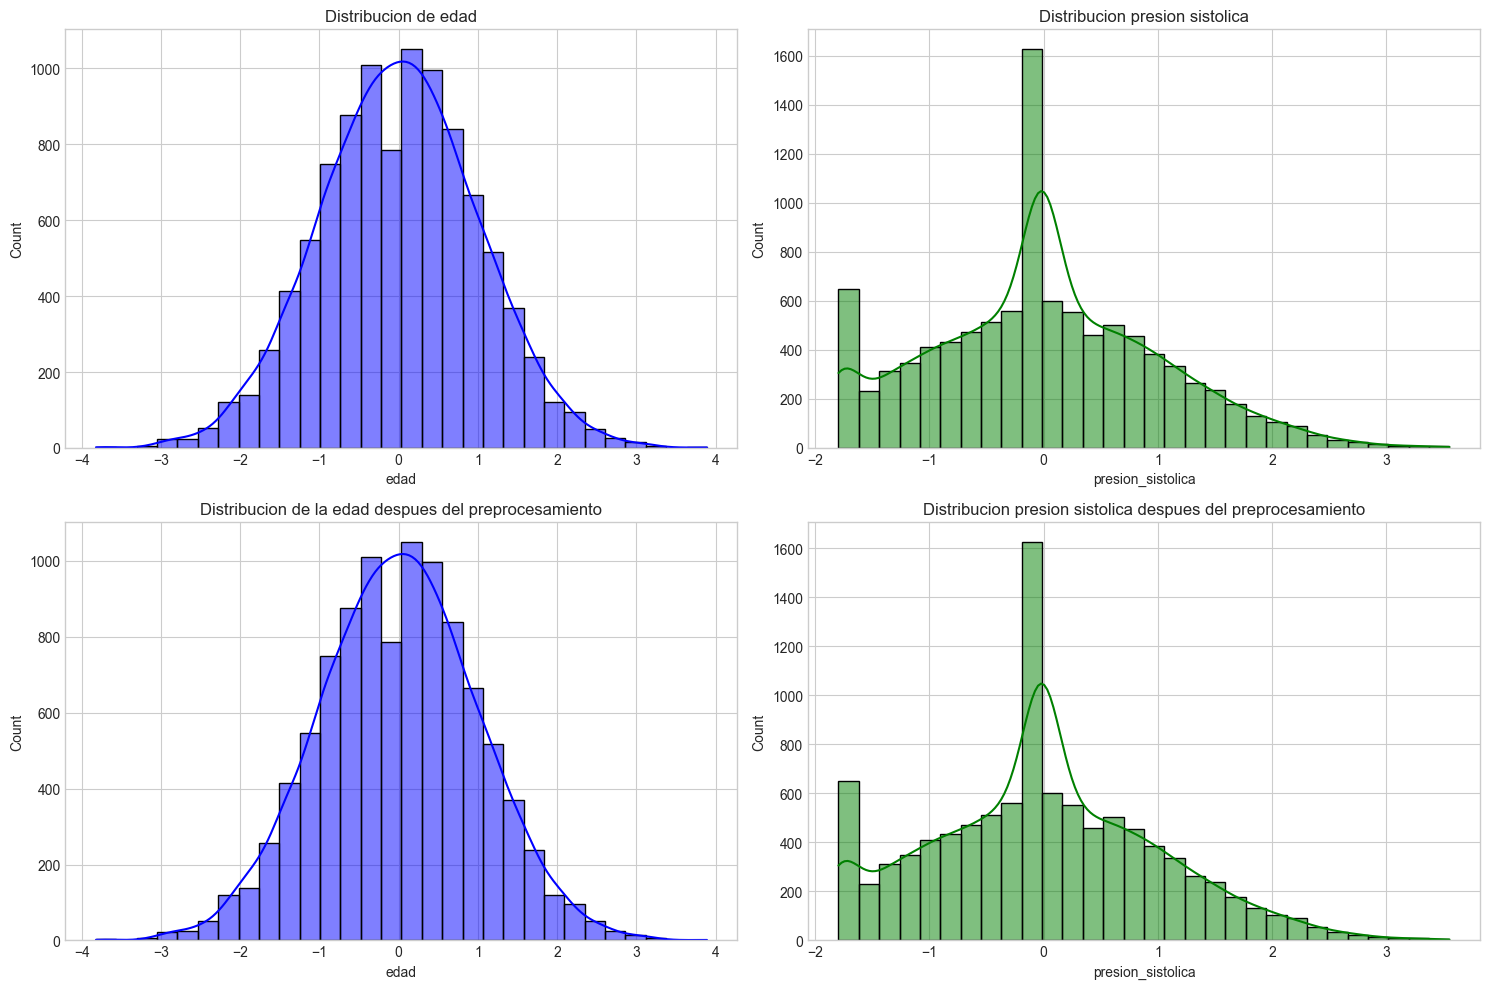

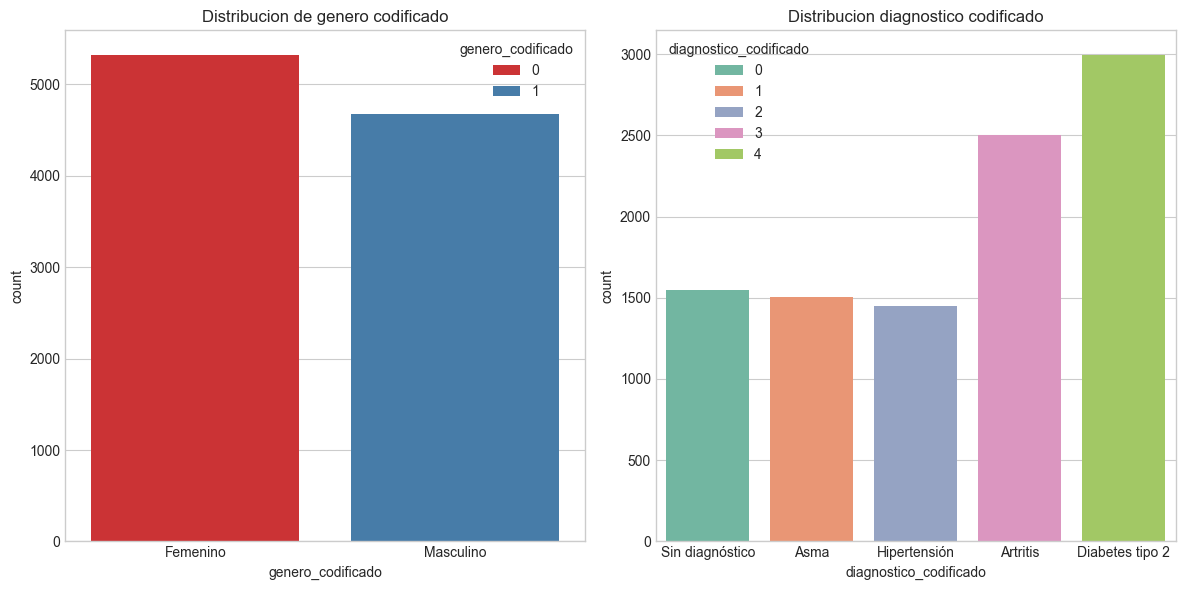

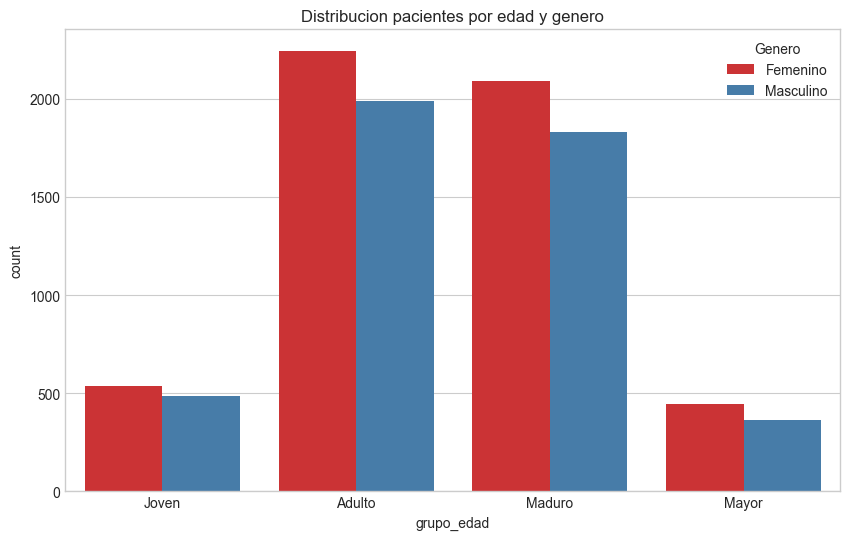

In [41]:
# Configurar tamaño de las gráficas
plt.figure(figsize=(15, 10))

# 1. Distribución de variables numéricas antes y después del preprocesamiento
# Antes del preprocesamiento
plt.subplot(2, 2, 1)
sns.histplot(pacientes_scaled['edad'], kde = True, color = 'blue', bins = 30)
plt.title('Distribucion de edad')

plt.subplot(2, 2, 2)
sns.histplot(pacientes_scaled['presion_sistolica'], kde = True, color= 'green', bins= 30)
plt.title('Distribucion presion sistolica')



# 2. Distribución de las variables numéricas después del preprocesamiento (usando MinMaxScaler)
plt.subplot(2, 2, 3)
sns.histplot(pacientes_scaled['edad'], kde = True, color = 'blue', bins = 30)
plt.title('Distribucion de la edad despues del preprocesamiento')

plt.subplot(2, 2, 4)
sns.histplot(pacientes_scaled['presion_sistolica'], kde = True, color= 'green', bins= 30)
plt.title('Distribucion presion sistolica despues del preprocesamiento')
# Ajuste del diseño para las 4 gráficas
plt.tight_layout()

# 3. Distribución de las variables categóricas codificadas
# Visualizar la codificación de género y diagnóstico con hue para diferenciación por género
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.countplot(x = 'genero_codificado', data = pacientes_df, hue = 'genero_codificado', palette = 'Set1')
plt.title('Distribucion de genero codificado')
plt.xticks([0, 1], ['Femenino','Masculino'])


# Visualizar la distribución del diagnóstico con hue para diferenciación por diagnóstico
plt.subplot(1, 2, 2)
sns.countplot(x = 'diagnostico_codificado', data = pacientes_df, hue = 'diagnostico_codificado', palette = 'Set2')
plt.title('Distribucion diagnostico codificado')
plt.xticks([0, 1, 2, 3, 4], pacientes_df['diagnostico'].unique())

# Ajuste del diseño para las gráficas categóricas
plt.tight_layout()



# Graficar la distribución de los pacientes por edad y género codificado
plt.figure(figsize=(10,6))
sns.countplot(x = 'grupo_edad', data = pacientes_df, hue = 'genero_codificado', palette = 'Set1')
plt.title('Distribucion pacientes por edad y genero')
plt.xticks([0, 1, 2, 3], ['Joven', 'Adulto', 'Maduro', 'Mayor'])
plt.legend(title = 'Genero', labels = ['Femenino', 'Masculino'])


plt.show()